In [41]:
import csv
import numpy as np
from matplotlib import pyplot as plt

In [42]:
#read dataset from file
dataset = []

with open("assignment02.csv") as csvfile:
    reader = csv.reader(csvfile)
    for word in csvfile:
        color,radius,weight,class_name = word.strip().split(",")
        if color == "Color":
            continue
        new_fruit = (color, float(radius), float(weight), class_name)
        dataset.append(new_fruit)
dataset = np.array(dataset,dtype="object")
print("Data is read")
dataset

Data is read


array([['Green', 4.3, 122.0, 'Pear'],
       ['Green', 4.6, 152.0, 'Pear'],
       ['Green', 3.1, 85.0, 'Apple'],
       ['Green', 3.6, 173.0, 'Pear'],
       ['Green', 2.5, 65.0, 'Lemon'],
       ['Green', 2.5, 70.0, 'Apple'],
       ['Green', 2.7, 73.0, 'Apple'],
       ['Green', 4.5, 110.0, 'Pear'],
       ['Green', 2.5, 86.0, 'Apple'],
       ['Green', 2.4, 68.0, 'Lemon'],
       ['Green', 4.2, 126.0, 'Pear'],
       ['Red', 3.7, 101.0, 'Apple'],
       ['Red', 3.7, 100.0, 'Apple'],
       ['Red', 3.4, 80.0, 'Apple'],
       ['Yellow', 3.2, 79.0, 'Apple'],
       ['Yellow', 3.1, 69.0, 'Lemon'],
       ['Yellow', 2.1, 64.0, 'Apple'],
       ['Yellow', 2.6, 58.0, 'Lemon'],
       ['Yellow', 2.1, 40.0, 'Lemon'],
       ['Yellow', 2.3, 60.0, 'Lemon'],
       ['Yellow', 4.2, 105.0, 'Pear'],
       ['Yellow', 2.1, 40.0, 'Lemon'],
       ['Yellow', 3.2, 64.0, 'Lemon'],
       ['Yellow', 2.9, 53.0, 'Lemon'],
       ['Yellow', 4.1, 135.0, 'Pear'],
       ['Yellow', 5.2, 142.0, 'Pear'],
    

Scatter plot is built


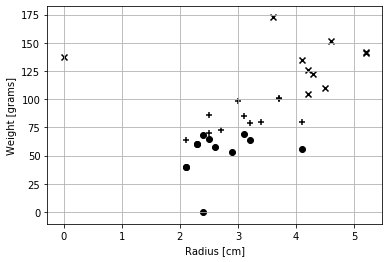

In [43]:
fruit_markers = {"Apple":"+",
                 "Pear":"x",
                 "Lemon":"o"}

def plot_scatter_radius_weight(data, class_name):
    raws_to_plot = np.where(data[:,3] == class_name)
    matrix_to_plot = data[raws_to_plot]
    plt.scatter(matrix_to_plot[:,1],matrix_to_plot[:,2], c="black", marker=fruit_markers[class_name])

for fruit_name in fruit_markers.keys():
    plot_scatter_radius_weight(dataset,fruit_name)
plt.grid()
plt.xlabel("Radius [cm]")
plt.ylabel("Weight [grams]")
print("Scatter plot is built")
plt.show()

Bar plot is built


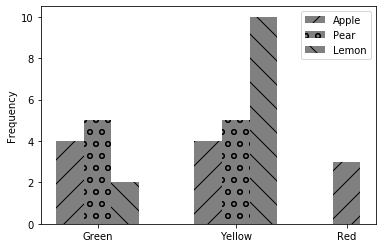

In [44]:
fruit_bar_markers = {"Apple":"/",
                     "Pear" : "o",
                     "Lemon": "\\",}

colors = ("Green", "Yellow", "Red")
length_between_colors = 5

def plot_bar_fruit_color_frequency(data, fruit):
    color_graph_pos = []
    bar_length_measurements = [] 
    all_fruit = data[np.where(data[:, 3] == fruit)]
    for color_index in range(len(colors)):
        color_fruit = all_fruit[np.where(all_fruit[:,0] == colors[color_index])]
        frout_color_bar_position = list(fruit_bar_markers.keys()).index(fruit) if len(color_fruit) != 0 else 0
        current_color_graph_pos = frout_color_bar_position + color_index*length_between_colors
        color_graph_pos.append(current_color_graph_pos)
        bar_length_measurements.append(len(color_fruit))
    plt.bar(color_graph_pos, bar_length_measurements, color="grey",width=1, hatch=fruit_bar_markers[fruit], label=fruit)
    return color_graph_pos

positions = []
for fruit in fruit_bar_markers.keys():
    current_bar_pos = plot_bar_fruit_color_frequency(dataset, fruit)
    positions.append(current_bar_pos)
ticks = np.median(positions, axis=0)
axes = plt.gca()
axes.set_xticks(ticks)
axes.set_xticklabels(colors)
axes.legend()
plt.ylabel("Frequency")
print("Bar plot is built")
plt.show()

In [45]:
def float_not_equal(num1, num2):
    float_scale = pow(10, -11)
    return not abs(num1-num2) < float_scale

def rows_equal(row_a, row_b):    
    if row_a[0] != row_b[0] or row_a[3] != row_b[3]:
        return False
    if float_not_equal(row_a[1], row_b[1]) or float_not_equal(row_a[2], row_b[2]):
        return False
    return True

duplicates = []
for i in range(len(dataset)):
    for j in range(i+1, len(dataset[i])):
        if rows_equal(dataset[i], dataset[j]):
            duplicates.append(j)
dataset = np.delete(dataset, duplicates, axis=0)
print("Duplicates are removed")
dataset

Duplicates are removed


array([['Green', 4.3, 122.0, 'Pear'],
       ['Green', 4.6, 152.0, 'Pear'],
       ['Green', 3.1, 85.0, 'Apple'],
       ['Green', 3.6, 173.0, 'Pear'],
       ['Green', 2.5, 65.0, 'Lemon'],
       ['Green', 2.5, 70.0, 'Apple'],
       ['Green', 2.7, 73.0, 'Apple'],
       ['Green', 4.5, 110.0, 'Pear'],
       ['Green', 2.5, 86.0, 'Apple'],
       ['Green', 2.4, 68.0, 'Lemon'],
       ['Green', 4.2, 126.0, 'Pear'],
       ['Red', 3.7, 101.0, 'Apple'],
       ['Red', 3.7, 100.0, 'Apple'],
       ['Red', 3.4, 80.0, 'Apple'],
       ['Yellow', 3.2, 79.0, 'Apple'],
       ['Yellow', 3.1, 69.0, 'Lemon'],
       ['Yellow', 2.1, 64.0, 'Apple'],
       ['Yellow', 2.6, 58.0, 'Lemon'],
       ['Yellow', 2.1, 40.0, 'Lemon'],
       ['Yellow', 2.3, 60.0, 'Lemon'],
       ['Yellow', 4.2, 105.0, 'Pear'],
       ['Yellow', 2.1, 40.0, 'Lemon'],
       ['Yellow', 3.2, 64.0, 'Lemon'],
       ['Yellow', 2.9, 53.0, 'Lemon'],
       ['Yellow', 4.1, 135.0, 'Pear'],
       ['Yellow', 5.2, 142.0, 'Pear'],
    

In [46]:
zero_indecies = np.where(dataset == 0.0)
rows, cols = zero_indecies
for i in range(len(rows)):
    x = rows[i]
    y = cols[i]
    array_for_mean = dataset[:,y]
    val = np.mean(np.delete(array_for_mean, x))
    dataset[x,y] = val
print("Zero values replaced by mean")
dataset

Zero values replaced by mean


array([['Green', 4.3, 122.0, 'Pear'],
       ['Green', 4.6, 152.0, 'Pear'],
       ['Green', 3.1, 85.0, 'Apple'],
       ['Green', 3.6, 173.0, 'Pear'],
       ['Green', 2.5, 65.0, 'Lemon'],
       ['Green', 2.5, 70.0, 'Apple'],
       ['Green', 2.7, 73.0, 'Apple'],
       ['Green', 4.5, 110.0, 'Pear'],
       ['Green', 2.5, 86.0, 'Apple'],
       ['Green', 2.4, 68.0, 'Lemon'],
       ['Green', 4.2, 126.0, 'Pear'],
       ['Red', 3.7, 101.0, 'Apple'],
       ['Red', 3.7, 100.0, 'Apple'],
       ['Red', 3.4, 80.0, 'Apple'],
       ['Yellow', 3.2, 79.0, 'Apple'],
       ['Yellow', 3.1, 69.0, 'Lemon'],
       ['Yellow', 2.1, 64.0, 'Apple'],
       ['Yellow', 2.6, 58.0, 'Lemon'],
       ['Yellow', 2.1, 40.0, 'Lemon'],
       ['Yellow', 2.3, 60.0, 'Lemon'],
       ['Yellow', 4.2, 105.0, 'Pear'],
       ['Yellow', 2.1, 40.0, 'Lemon'],
       ['Yellow', 3.2, 64.0, 'Lemon'],
       ['Yellow', 2.9, 53.0, 'Lemon'],
       ['Yellow', 4.1, 135.0, 'Pear'],
       ['Yellow', 5.2, 142.0, 'Pear'],
    

In [47]:
colors_numeration = {"Green" : 0,
                     "Red" : 1,
                     "Yellow" : 2}
for k,v in colors_numeration.items():
    dataset[dataset == k] = v
print("String values instead of class value are replaced for numbers")
dataset

String values instead of class value are replaced for numbers


array([[0, 4.3, 122.0, 'Pear'],
       [0, 4.6, 152.0, 'Pear'],
       [0, 3.1, 85.0, 'Apple'],
       [0, 3.6, 173.0, 'Pear'],
       [0, 2.5, 65.0, 'Lemon'],
       [0, 2.5, 70.0, 'Apple'],
       [0, 2.7, 73.0, 'Apple'],
       [0, 4.5, 110.0, 'Pear'],
       [0, 2.5, 86.0, 'Apple'],
       [0, 2.4, 68.0, 'Lemon'],
       [0, 4.2, 126.0, 'Pear'],
       [1, 3.7, 101.0, 'Apple'],
       [1, 3.7, 100.0, 'Apple'],
       [1, 3.4, 80.0, 'Apple'],
       [2, 3.2, 79.0, 'Apple'],
       [2, 3.1, 69.0, 'Lemon'],
       [2, 2.1, 64.0, 'Apple'],
       [2, 2.6, 58.0, 'Lemon'],
       [2, 2.1, 40.0, 'Lemon'],
       [2, 2.3, 60.0, 'Lemon'],
       [2, 4.2, 105.0, 'Pear'],
       [2, 2.1, 40.0, 'Lemon'],
       [2, 3.2, 64.0, 'Lemon'],
       [2, 2.9, 53.0, 'Lemon'],
       [2, 4.1, 135.0, 'Pear'],
       [2, 5.2, 142.0, 'Pear'],
       [2, 2.3, 60.0, 'Lemon'],
       [2, 3.309375, 137.0, 'Pear'],
       [2, 3.0, 98.0, 'Apple'],
       [2, 2.4, 90.375, 'Lemon'],
       [2, 4.1, 56.0, 'Lemon'],

In [48]:
min_val = np.min(dataset[:,:3], axis=0)
max_val = np.max(dataset[:,:3], axis=0)
dataset[:, :3] = (dataset[:, :3] - min_val)/(max_val - min_val)
print("Matrix normalized through the min max criteria")
dataset

Matrix normalized through the min max criteria


array([[0.0, 0.7096774193548386, 0.6165413533834586, 'Pear'],
       [0.0, 0.8064516129032256, 0.8421052631578947, 'Pear'],
       [0.0, 0.3225806451612903, 0.3383458646616541, 'Apple'],
       [0.0, 0.48387096774193544, 1.0, 'Pear'],
       [0.0, 0.1290322580645161, 0.18796992481203006, 'Lemon'],
       [0.0, 0.1290322580645161, 0.22556390977443608, 'Apple'],
       [0.0, 0.19354838709677422, 0.24812030075187969, 'Apple'],
       [0.0, 0.7741935483870968, 0.5263157894736842, 'Pear'],
       [0.0, 0.1290322580645161, 0.3458646616541353, 'Apple'],
       [0.0, 0.09677419354838704, 0.21052631578947367, 'Lemon'],
       [0.0, 0.6774193548387097, 0.6466165413533834, 'Pear'],
       [0.5, 0.5161290322580645, 0.45864661654135336, 'Apple'],
       [0.5, 0.5161290322580645, 0.45112781954887216, 'Apple'],
       [0.5, 0.4193548387096773, 0.3007518796992481, 'Apple'],
       [1.0, 0.3548387096774194, 0.2932330827067669, 'Apple'],
       [1.0, 0.3225806451612903, 0.21804511278195488, 'Lemon'],
  